# EDA of logp_ochem_dataset.csv

## Summary

1. There are 980 definitely experimental items (the method for logP measurement is mentioned). 
2. There are 67% NA values for Temperature, 56% NA for pH.
3. All in all 773 logP records, 255 logP+t records, 167 full records


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

import sys

# original dataset (logp_ochem_dataset.csv) was preprocessed: 
# some columns removed + column 'methodKnown' added (1 - logP measurement method known, 0 - otherwise)
OCHEM_DATA_FILE_PATH = "../data/raw/logp_ochem_dataset_fixed.csv"

In [2]:
def check_na(df, column):
    n = df.shape[0]
    num_of_na = df[column].isna().sum()
    frac_of_na = int(100.0*(num_of_na / n))
    print("# of NA values " + column + ": " + str(num_of_na) + ", " + str(frac_of_na) + "%")
    print(df[df[column].isna()].head())

In [3]:
ochem_data = pd.read_csv(OCHEM_DATA_FILE_PATH, delimiter=",", low_memory=False)
ochem_data.head()

,SMILES,logPow {measured},pH,logPow Method,Temperature,methodKnown,Unnamed: 6
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,NaN,NaN,NaN,0,NaN
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1,NaN,NaN,NaN,0,NaN
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2,NaN,NaN,NaN,0,NaN
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,NaN,NaN,NaN,0,NaN
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,NaN,NaN,NaN,0,NaN


In [4]:
ochem_logp_data = ochem_data.drop(columns=['Unnamed: 6'])

In [5]:
ochem_logp_data.shape

(85842, 6)

In [6]:
ochem_logp_data = ochem_logp_data.rename(columns={'logPow {measured}': 'logP'})
ochem_logp_data.head()

,SMILES,logP,pH,logPow Method,Temperature,methodKnown
0,NC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,1.77,NaN,NaN,NaN,0
1,CNC1=C(CO)C2=NC3=CC=CC=C3C=C2C=C1,2.1,NaN,NaN,NaN,0
2,CN(C)C1=C(CO)C2=NC3=C(C=CC=C3)C=C2C=C1,2.2,NaN,NaN,NaN,0
3,O=C1NC2=C(CO1)C1=C(C=C2)C=C2C=CC=CC2=N1,1.64,NaN,NaN,NaN,0
4,CN(C1=CC2=NC3=C(C=CC4=C3COCN4)C=C2C=C1)S(C)(=O)=O,1.54,NaN,NaN,NaN,0


In [7]:
ochem_logp_data.methodKnown.sum()

980

In [8]:
ochem_logp_data = ochem_logp_data[ochem_logp_data.methodKnown == 1]
ochem_logp_data = ochem_logp_data.drop(columns=['methodKnown'])

In [9]:
ochem_logp_data.shape

(980, 5)

In [10]:
ochem_logp_data['logP'] = pd.to_numeric(ochem_logp_data['logP'], errors='coerce')
ochem_logp_data['Temperature'] = pd.to_numeric(ochem_logp_data['Temperature'], errors='coerce')
ochem_logp_data['pH'] = pd.to_numeric(ochem_logp_data['pH'], errors='coerce')
ochem_logp_data.head()

,SMILES,logP,pH,logPow Method,Temperature
28,CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...,1.5,NaN,HPLC,NaN
29,CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...,1.7,NaN,HPLC,NaN
30,COC1=CC=C(C=C1)N1N=C(C)C=C1C(=O)NC1=CC=C(C=C1)...,2.9,NaN,HPLC,NaN
31,CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=C(C=CC=C1)S...,2.1,NaN,HPLC,NaN
32,CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...,2.3,NaN,HPLC,NaN


In [11]:
ochem_logp_data = ochem_logp_data[ochem_logp_data['logP'].notnull()]

In [12]:
ochem_logp_data = ochem_logp_data.drop_duplicates()
ochem_logp_data.shape

(773, 5)

In [13]:
LOGP_COLUMN = 'logP'
PH_COLUMN = 'pH'
LOGP_TEMP_COLUMN = 'Temperature'
SMILES_COLUMN = 'SMILES'
n = ochem_logp_data.shape[0]

In [14]:
check_na(ochem_logp_data, LOGP_COLUMN)

# of NA values logP: 0, 0%
Empty DataFrame
Columns: [SMILES, logP, pH, logPow Method, Temperature]
Index: []


In [15]:
check_na(ochem_logp_data, LOGP_TEMP_COLUMN)

# of NA values Temperature: 518, 67%
                                               SMILES  logP  pH logPow Method  \
28  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...   1.5 NaN          HPLC   
29  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...   1.7 NaN          HPLC   
30  COC1=CC=C(C=C1)N1N=C(C)C=C1C(=O)NC1=CC=C(C=C1)...   2.9 NaN          HPLC   
31  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=C(C=CC=C1)S...   2.1 NaN          HPLC   
32  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...   2.3 NaN          HPLC   

    Temperature  
28          NaN  
29          NaN  
30          NaN  
31          NaN  
32          NaN  


In [16]:
check_na(ochem_logp_data, PH_COLUMN)

# of NA values pH: 440, 56%
                                               SMILES  logP  pH logPow Method  \
28  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...   1.5 NaN          HPLC   
29  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...   1.7 NaN          HPLC   
30  COC1=CC=C(C=C1)N1N=C(C)C=C1C(=O)NC1=CC=C(C=C1)...   2.9 NaN          HPLC   
31  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=C(C=CC=C1)S...   2.1 NaN          HPLC   
32  CC1=NN(C(=C1)C(=O)NC1=CC=C(C=C1)C1=CC=CC=C1S(N...   2.3 NaN          HPLC   

    Temperature  
28          NaN  
29          NaN  
30          NaN  
31          NaN  
32          NaN  


In [17]:
ochem_logp_data[SMILES_COLUMN].unique().size

666

In [18]:
ochem_logp_data[ochem_logp_data[SMILES_COLUMN].duplicated(keep=False)].groupby(SMILES_COLUMN).count()

,logP,pH,logPow Method,Temperature
SMILES,,,,
CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O,6,0,6,0
CC(=O)O[Pt](N)(N)(Cl)(Cl)OC(C)=O,4,0,4,0
CC(=O)O[Pt]1(Cl)(Cl)(NCCN1)OC(C)=O,3,0,3,0
CC(=O)O[Pt]1(Cl)(Cl)(N[C@@H]2CCCC[C@H]2N1)OC(C)=O,2,0,2,0
CC(=O)O[Pt]1(N)(N)(OC(C)=O)OCC(=O)O1,2,0,2,0
...,...,...,...,...
OCC1N[Pt](Cl)(Cl)NC1C1=CC=C(F)C=C1,2,0,2,0
OCCC1N[Pt](Cl)(Cl)NC1C1=CC=C(F)C=C1,2,0,2,0
OCCN1CCN[Pt]1(Cl)Cl,3,0,3,0


In [19]:
ochem_logp_data[ochem_logp_data[SMILES_COLUMN] == 'CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O']

,SMILES,logP,pH,logPow Method,Temperature
78867,CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O,-0.160,NaN,shake flask,NaN
78888,CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O,-0.190,NaN,shake flask,NaN
78895,CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O,0.100,NaN,shake flask,NaN
78899,CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O,0.255,NaN,shake flask,NaN
82313,CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O,-0.210,NaN,RP-HPLC,NaN
82339,CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O,-0.141,NaN,RP-HPLC,NaN


In [20]:
ochem_logp_data.describe()

,logP,pH,Temperature
count,773.000000,333.000000,255.000000
mean,0.394290,7.301201,25.800000
std,3.035107,1.443744,2.999212
min,-3.360000,2.000000,25.000000
25%,-1.330000,7.000000,25.000000
50%,-0.047000,7.200000,25.000000
75%,1.600000,7.400000,25.000000
max,46.420000,13.000000,37.000000


In [21]:
ochem_logp_data[(ochem_logp_data['pH'].notnull()) & (ochem_logp_data['Temperature'].notnull())]

,SMILES,logP,pH,logPow Method,Temperature
21319,CC(C)[C@@H](NC(=O)CN)C(O)=O,-1.33,7.0,shake flask,25.0
21320,C[C@H](N)C(=O)N[C@@H](C)C(O)=O,-2.00,7.0,shake flask,25.0
30396,CCC(C)[C@H](NC(=O)[C@H](C)N)C(O)=O,-2.60,7.0,shake flask,25.0
30397,CC(C)[C@H](NC(=O)[C@H](C)N)C(O)=O,-1.13,7.0,shake flask,25.0
30398,CC(C)C[C@H](NC(=O)CN)C(O)=O,-0.78,7.0,shake flask,25.0
...,...,...,...,...,...
84935,CC(C)CC(NC(=O)C(CC1=CN=CN1)NC(=O)C(N)CC1=CC=CC...,0.64,10.0,shake flask,25.0
84936,CC(C)C(NC(=O)C(CC1=CN=CN1)NC(=O)C(N)CC1=CNC2=C...,0.31,10.0,shake flask,25.0
84937,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CNC2=CC=CC=C12)C(=...,1.00,10.0,shake flask,25.0
84938,CCC(C)C(NC(=O)C(N)CCC(O)=O)C(=O)NC(CC1=CC=CC=C...,0.43,2.0,shake flask,25.0


In [22]:
ochem_logp_data[ochem_logp_data['Temperature'].notnull()]

,SMILES,logP,pH,logPow Method,Temperature
21317,CC(C)[C@@H](NC(=O)CN)C(O)=O,-1.33,NaN,shake flask,25.0
21318,C[C@H](N)C(=O)N[C@@H](C)C(O)=O,-2.00,NaN,shake flask,25.0
21319,CC(C)[C@@H](NC(=O)CN)C(O)=O,-1.33,7.0,shake flask,25.0
21320,C[C@H](N)C(=O)N[C@@H](C)C(O)=O,-2.00,7.0,shake flask,25.0
23197,CC(=O)OC1=C(C=CC=C1)C(O)=O,1.10,NaN,pH-metric titration,37.0
...,...,...,...,...,...
84935,CC(C)CC(NC(=O)C(CC1=CN=CN1)NC(=O)C(N)CC1=CC=CC...,0.64,10.0,shake flask,25.0
84936,CC(C)C(NC(=O)C(CC1=CN=CN1)NC(=O)C(N)CC1=CNC2=C...,0.31,10.0,shake flask,25.0
84937,NC(CC1=CC=CC=C1)C(=O)NC(CC1=CNC2=CC=CC=C12)C(=...,1.00,10.0,shake flask,25.0
84938,CCC(C)C(NC(=O)C(N)CCC(O)=O)C(=O)NC(CC1=CC=CC=C...,0.43,2.0,shake flask,25.0


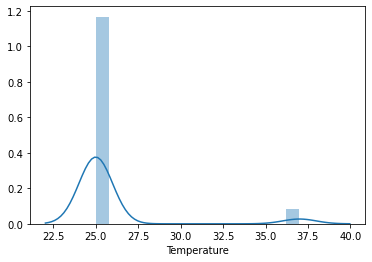

In [23]:
sns.distplot(ochem_logp_data['Temperature'])

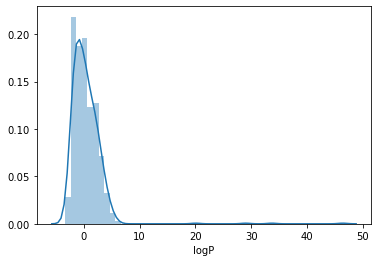

In [25]:
sns.distplot(ochem_logp_data['logP'])

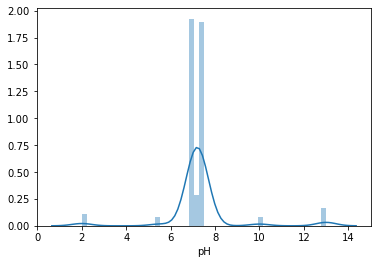

In [26]:
sns.distplot(ochem_logp_data['pH'])

In [27]:
ochem_logp_data = ochem_logp_data.drop(columns=['logPow Method'])

In [28]:
ochem_logp_data.to_csv("../data/1_filtering/ochem_logp.csv")

ochem_logp_data = ochem_logp_data[ochem_logp_data['Temperature'].notnull()] 
ochem_logp_data.to_csv("../data/1_filtering/ochem_logp_temperature.csv")

ochem_logp_data = ochem_logp_data[(ochem_logp_data['pH'].notnull()) & (ochem_logp_data['Temperature'].notnull())]
ochem_logp_data.to_csv("../data/1_filtering/ochem_full.csv")